In [112]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV


In [113]:
data = pd.read_csv("Airlines.csv")
data.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [114]:
data2 = data.copy()
data2

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


   Airline  Delay
0       9E  20686
1       AA  45656
2       AS  11471
3       B6  18112
4       CO  21118
5       DL  60940
6       EV  27983
7       F9   6456
8       FL  20827
9       HA   5578
10      MQ  36605
11      OH  12630
12      OO  50254
13      UA  27619
14      US  34500
15      WN  94097
16      XE  31126
17      YV  13725


<AxesSubplot:title={'center':"AIRLINES' DELAYS"}, xlabel='Airline'>

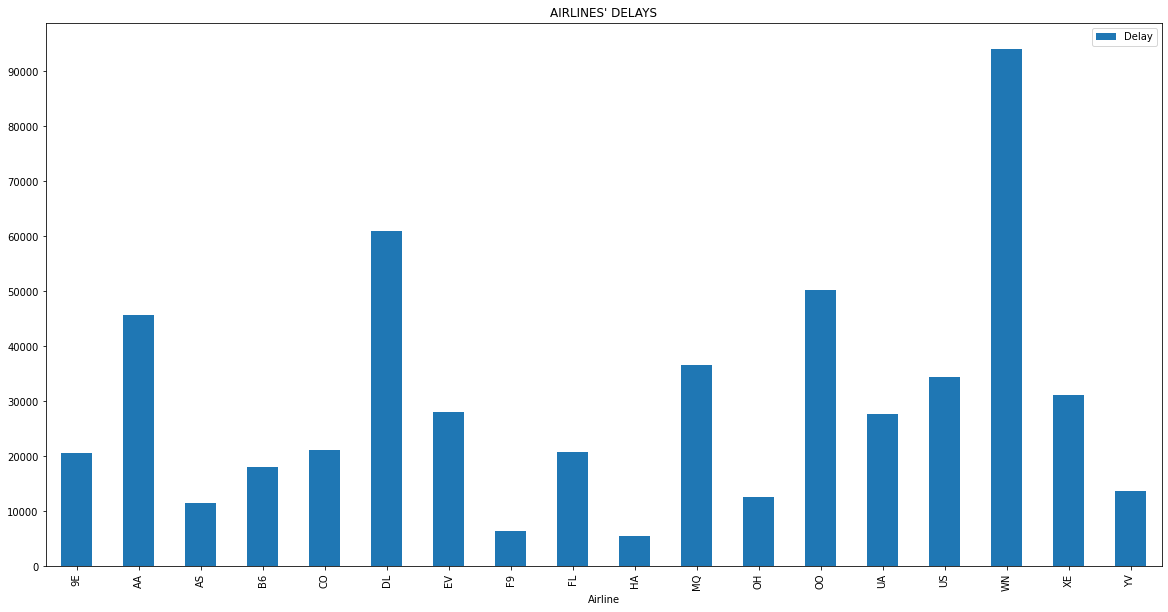

In [116]:
del_airlines = data[["Delay", "Airline"]].groupby("Airline").agg("count").reset_index()
print(del_airlines)
del_airlines.plot(x = "Airline", y = "Delay", kind = "bar", title = "AIRLINES' DELAYS",figsize = (20,10), yticks = np.arange(0,100000, 10000))


   DayOfWeek  Delay
0          1  72769
1          2  71340
2          3  89746
3          4  91445
4          5  85248
5          6  58956
6          7  69879


<AxesSubplot:title={'center':'DAILY DELAYS'}, xlabel='DayOfWeek'>

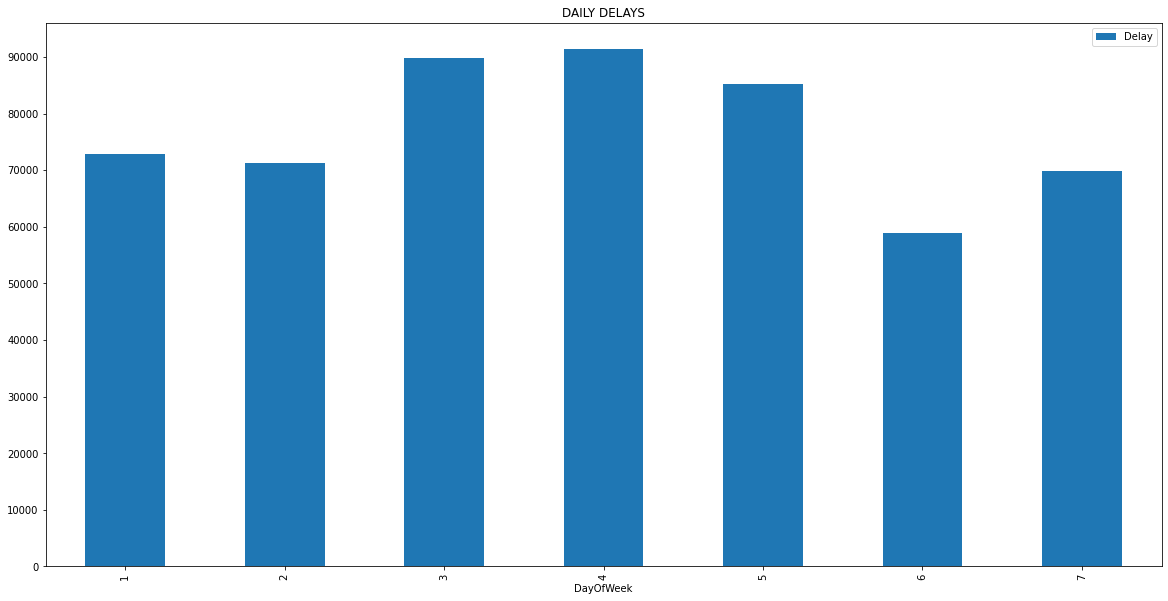

In [117]:
del_days = data[["Delay", "DayOfWeek"]].groupby("DayOfWeek").agg("count").reset_index()
print(del_days)
del_days.plot(x = "DayOfWeek", y = "Delay", kind = "bar", title = "DAILY DELAYS",figsize = (20,10), yticks = np.arange(0,100000, 10000))

### Numerical Data

array([[<AxesSubplot:title={'center':'Flight'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>],
       [<AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'Length'}>],
       [<AxesSubplot:title={'center':'Delay'}>, <AxesSubplot:>]],
      dtype=object)

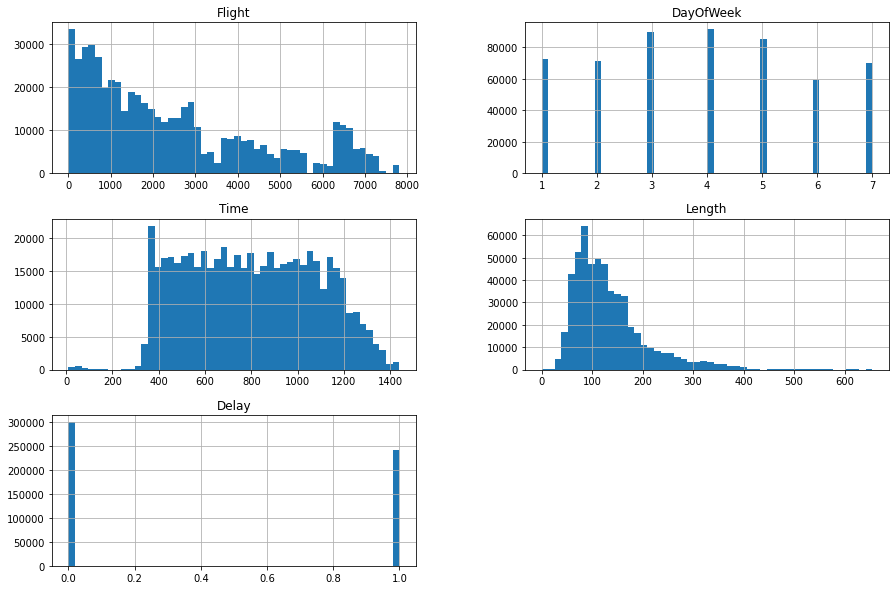

In [118]:

numeric_data = data.copy()
numeric_data.drop({"Airline","AirportFrom","AirportTo","id"}, axis = 1,inplace = True)
%matplotlib inline
numeric_data.hist(bins = 50 , figsize = (15,10))


In [119]:
correlation= numeric_data.corr()
correlation

,Flight,DayOfWeek,Time,Length,Delay
Flight,1.000000,0.000416,-0.005750,-0.341481,-0.046175
DayOfWeek,0.000416,1.000000,0.001273,0.013397,-0.026199
Time,-0.005750,0.001273,1.000000,-0.020612,0.150454
Length,-0.341481,0.013397,-0.020612,1.000000,0.040489
Delay,-0.046175,-0.026199,0.150454,0.040489,1.000000


In [120]:
correlation["Delay"].sort_values(ascending = False)

Delay        1.000000
Time         0.150454
Length       0.040489
DayOfWeek   -0.026199
Flight      -0.046175
Name: Delay, dtype: float64

### Categorical Data

In [121]:
categorical_data = data[["Airline", "AirportTo", "AirportFrom"]]
categorical_data

,Airline,AirportTo,AirportFrom
0,CO,IAH,SFO
1,US,CLT,PHX
2,AA,DFW,LAX
3,AA,DFW,SFO
4,AS,SEA,ANC
...,...,...,...
539378,CO,SNA,OGG
539379,FL,ATL,SEA
539380,FL,MKE,SFO
539381,UA,SFO,HNL


In [122]:
from sklearn.preprocessing import LabelEncoder
for a in data.columns:
    if data[a].dtype == "object":
        print(data[a].values)
        le = LabelEncoder()
        le.fit(list(data[a].values))
        data[a] = le.transform(data[a].values)


data


['CO' 'US' 'AA' ... 'FL' 'UA' 'US']
['SFO' 'PHX' 'LAX' ... 'SFO' 'HNL' 'LAX']
['IAH' 'CLT' 'DFW' ... 'MKE' 'SFO' 'PHL']


,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,4,269,253,135,3,15,205,1
1,2,14,1558,217,60,3,15,222,1
2,3,1,2400,154,80,3,20,165,1
3,4,1,2466,253,80,3,20,195,1
4,5,2,108,14,252,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,4,178,203,264,5,1439,326,0
539379,539380,8,398,252,16,5,1439,305,0
539380,539381,8,609,253,184,5,1439,255,0
539381,539382,13,78,128,253,5,1439,313,1


### Target 

In [123]:
target = data["Delay"]

In [124]:
numeric_data.drop("Delay", axis = 1 , inplace = True)

# Test - Train split

In [125]:
from sklearn.model_selection import train_test_split
data.drop("Delay",axis=1,inplace=True)
x_train, x_test,y_train, y_test = train_test_split(data,target, test_size = 0.2, random_state = 42)
x_train_num, x_test_num,y_train_num, y_test_num = train_test_split(numeric_data,target, test_size = 0.2, random_state = 42)

### Spatial Representation: PCA


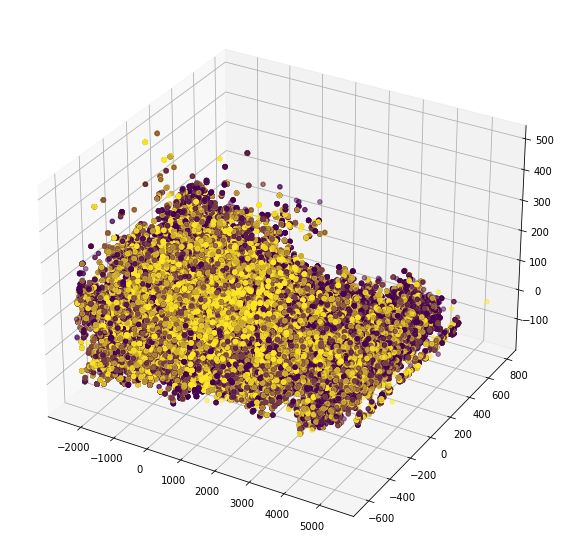

In [126]:
from sklearn.decomposition import PCA 

pca = PCA(n_components = 3)
X = pca.fit_transform(x_train_num)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X[:,0], X[:,1],X[:,2], alpha=0.5, c= y_train_num)




## ML MODEL

### KNN


In [127]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(10)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

print("Test accuracy:", accuracy_score(y_test, knn_pred))
cross_val_score(knn, x_train,y_train, cv = 10)


Test accuracy: 0.6016852526488501


array([0.60084355, 0.60137656, 0.60167783, 0.59657945, 0.60311464,
       0.59975435, 0.59784473, 0.60025492, 0.60308227, 0.60271147])

In [128]:
best_test_scores = []
best_train_scores = []
for k in range (40,45): 
        knn = KNeighborsClassifier(k)
        knn.fit(x_train, y_train)
        knn_pred = knn.predict(x_test)
        s = accuracy_score(y_test, knn_pred)
        best_test_scores.append(s)
        best_train_scores.append(accuracy_score(y_train, knn.predict(x_train)))


Text(0.5, 0, 'Test scores')

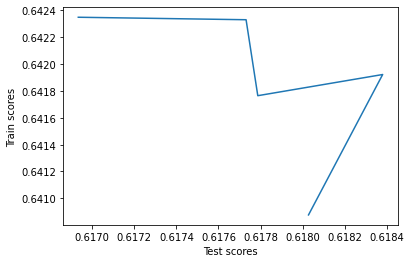

In [129]:
plt.plot(best_test_scores, best_train_scores)
plt.ylabel("Train scores")
plt.xlabel("Test scores")

In [130]:
knn = KNeighborsClassifier(43)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

print("Test accuracy with categoricals:", accuracy_score(y_test, knn_pred))
print("Train accuracy:", accuracy_score(y_train, knn.predict(x_train)))

Test accuracy with categoricals: 0.6183801922559953
Train accuracy: 0.6419215491789222


In [131]:
data2

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1


In [132]:

indices = knn_pred.nonzero()
predictions = data2.iloc[indices]
predictions["Delay"] = np.ones(40388)
predictions

/var/folders/dr/d_wys8sx6dj_8v6ssg_x0_qc0000gp/T/ipykernel_56544/43384153.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions["Delay"] = np.ones(40388)


,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
9,10,AA,2538,LAS,ORD,3,40,200,1.0
20,21,AS,128,FAI,SEA,3,80,206,1.0
21,22,DL,2223,ANC,SLC,3,85,270,1.0
25,26,AS,114,ANC,SEA,3,150,200,1.0
33,34,HA,108,HNL,KOA,3,302,41,1.0
...,...,...,...,...,...,...,...,...,...
107868,107869,US,486,PHX,DEN,2,585,109,1.0
107870,107871,US,687,PHX,EWR,2,585,282,1.0
107872,107873,WN,1148,MDW,TPA,2,585,165,1.0
107875,107876,WN,194,PHL,PIT,2,585,80,1.0


In [133]:
del_airlines_pred = predictions[ ["Airline","Delay", "DayOfWeek"]].groupby(["DayOfWeek","Airline"]).agg("count").reset_index()
del_airlines_pred.sort_values(["Delay","DayOfWeek"], axis = 0, ascending = False)

,DayOfWeek,Airline,Delay
87,5,WN,1199
51,3,WN,1190
69,4,WN,1187
15,1,WN,1176
123,7,WN,1058
...,...,...,...
20,2,AS,41
35,2,YV,34
29,2,OH,31
25,2,F9,25


Text(0, 0.5, 'N° delayed flights')

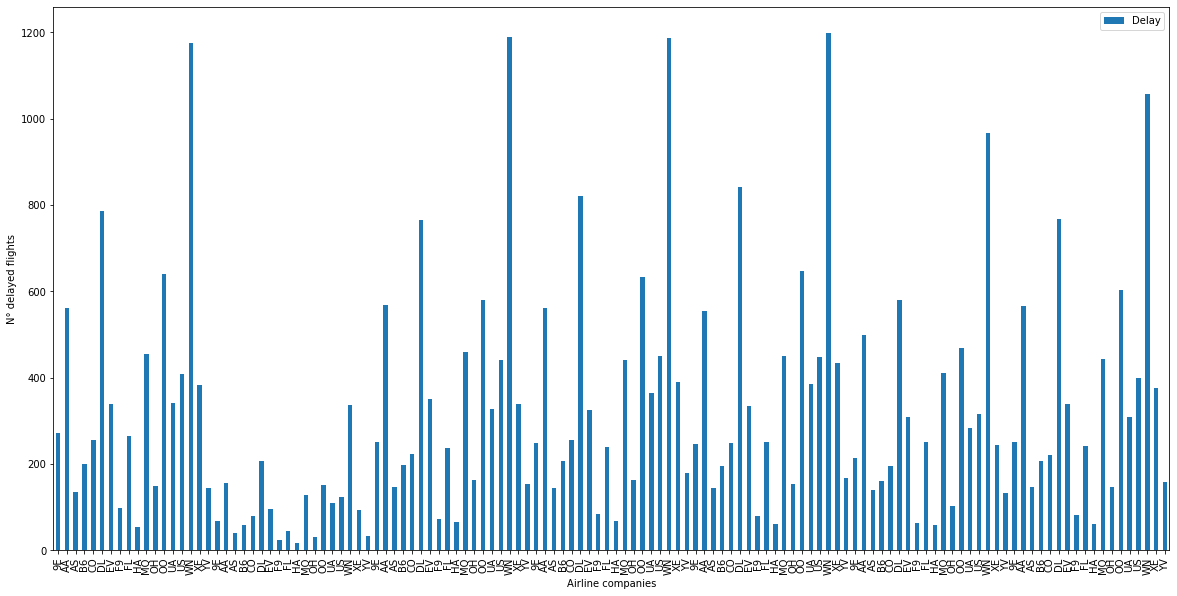

In [134]:

del_airlines_pred.plot( kind = "bar", x = "Airline", y = "Delay", figsize = (20,10))
plt.xlabel("Airline companies")
plt.ylabel("N° delayed flights")

<Figure size 2160x720 with 0 Axes>

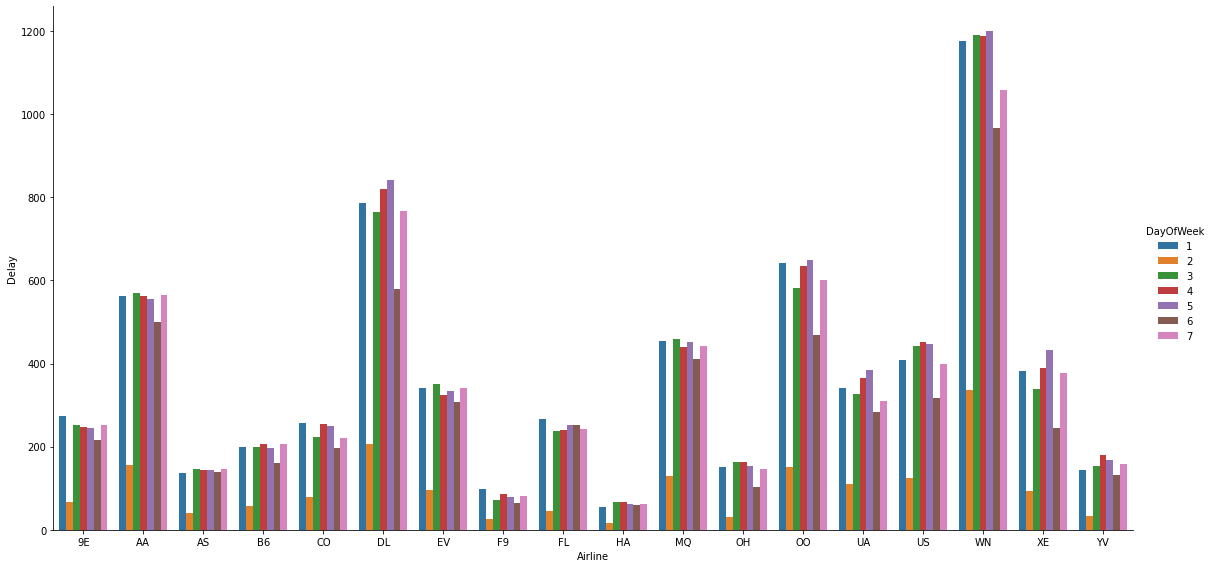

In [135]:
import seaborn as sns
plt.figure (figsize = (30,10))
sns.catplot(x = "Airline", y = "Delay", kind = "bar" , hue = "DayOfWeek",height = 8,aspect = 2, data = del_airlines_pred)


In [136]:
knn_num = KNeighborsClassifier(4)
knn_num.fit(x_train_num, y_train_num)
knn_num_pred = knn_num.predict(x_test_num)

print("Test accuracy without categoricals:", accuracy_score(y_test_num, knn_num_pred))
print("Train accuracy:", accuracy_score(y_train, knn_num.predict(x_train_num)))

Test accuracy without categoricals: 0.6416752412469757
Train accuracy: 0.7539663411401
